In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz

In [15]:
'''
df1= three days' order gulf sh data
df2= three days' order taxi sh data
df_all= three days' sh data   ----251062, 12
'''

"\ndf1= three days' order gulf sh data\ndf2= three days' order taxi sh data\ndf_all= three days' sh data   ----251062, 12\n"

In [16]:

# Shanghai-order-gulf-12
col = list(range(0,12))
df1= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/order_sh_22_gulf.csv',header=None, usecols=col,
                 sep=',',
                 names=['order_id','driver_id','car_id','city','start_long','start_lat',
                        'end_long','end_lat','start_time','end_time','type','label'])
col = list(range(0,12))
df1_1= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/order_sh_23_gulf.csv',header=None, usecols=col,
                 sep=',',
                 names=['order_id','driver_id','car_id','city','start_long','start_lat',
                        'end_long','end_lat','start_time','end_time','type','label'])
col = list(range(0,12))
df1_2= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/order_sh_24_gulf.csv',header=None, usecols=col,
                 sep=',',
                 names=['order_id','driver_id','car_id','city','start_long','start_lat',
                        'end_long','end_lat','start_time','end_time','type','label'])
frames = [df1,df1_1,df1_2]
df1 = pd.concat(frames)



,order_id,driver_id,car_id,city,start_long,start_lat,end_long,end_lat,start_time,end_time,type,label


In [17]:
# Shanghai-order-taxi-12/22
col = list(range(0,12))
df2= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/order_sh_22_taxi.csv',
                               header=None, usecols=col,sep=',',
                               names=['order_id','driver_id','car_id','city','start_long','start_lat',
                                      'end_long','end_lat','start_time','end_time','type','label'])
df2_1= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/order_sh_23_taxi.csv',
                               header=None, usecols=col,sep=',',
                               names=['order_id','driver_id','car_id','city','start_long','start_lat',
                                      'end_long','end_lat','start_time','end_time','type','label'])
df2_2= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/order_sh_24_taxi.csv',
                               header=None, usecols=col,sep=',',
                               names=['order_id','driver_id','car_id','city','start_long','start_lat',
                                      'end_long','end_lat','start_time','end_time','type','label'])
frames = [df2,df2_1,df2_2]
df2 = pd.concat(frames)
df_all=pd.concat([df1,df2])
print(df_all.loc[df_all.order_id.isin(['cde24521911253897f7aaa757db8f63f'])])

                            order_id                         driver_id  \
10  cde24521911253897f7aaa757db8f63f  c5f50851e5456e570e4239f93a94cb9c   

                              car_id city  start_long  start_lat   end_long  \
10  6f841dc0f531d9b0f8dbc6bbfbe20349  上海市  121.412758  31.231092  121.43865   

     end_lat           start_time             end_time  type  \
10  31.25756  2016-12-22 00:19:13  2016-12-22 00:41:40  gulf   

                  label  
10  2367020225580438500  


In [11]:
# Shanghai-gps-gulf-12/22
col = list(range(0,5))
df3= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/gps_data/sh_gps_gulf_22_17.csv',
                               header=None, usecols=col,sep=',',
                               names=['order_id','time','longitude','latitude','speed'])
df4= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/gps_data/sh_gps_gulf_22_18.csv',
                               header=None, usecols=col,sep=',',
                               names=['order_id','time','longitude','latitude','speed'])
df5= pd.read_csv('/Users/serenazhang/Desktop/didi_project/github/gps_data/sh_gps_gulf_23_17.csv',
                               header=None, usecols=col,sep=',',
                               names=['order_id','time','longitude','latitude','speed'])
frames = [df3,df4,df5]
df_gps = pd.concat(frames)
df_gps['time'] = pd.to_datetime(df_gps['time'],unit='s',utc=True)
df_gps["time"]=df_gps.time.dt.tz_localize("UTC").dt.tz_convert(pytz.timezone('Asia/Shanghai'))

In [7]:
'''
df_all data preperation
'''
#add column "cnt_of_same_trip" for number of occurence of same label given label number
df_all['cnt_of_same_trip'] = df_all.groupby(['label'])["label"].transform('count')
df_all.loc[df_all.cnt_of_same_trip>3,'cnt_of_same_trip']=0
#changing time column to datetime object
df_all.start_time=pd.to_datetime(df_all.start_time)
#df_all.drop(df_all.loc[df_all["end_time"]=="0000-00-00 00:00:00"])
#df_all.end_time=pd.to_datetime(df_all.end_time)


In [ ]:
df_all.to_pickle('/Users/serenazhang/Desktop/didi_project/github/df_all_sh_order')

In [12]:
df_gps.to_pickle('/Users/serenazhang/Desktop/didi_project/github/df_sh_gps')

,order_id,driver_id,car_id,city,start_long,start_lat,end_long,end_lat,start_time,end_time,type,label


In [8]:
k=df_all["cnt_of_same_trip"].value_counts().reset_index().rename(
    columns={'index': 'cnt_of_same_trips', "cnt_of_same_trip": 'count'})



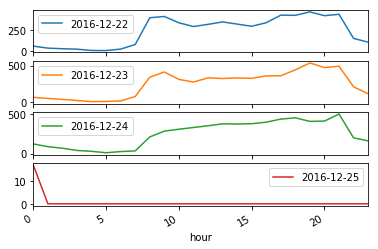

In [9]:
#group number of shared rides by hour
grouped=df_all.groupby(pd.TimeGrouper(key='start_time', freq='H'))["label"].apply(lambda x:(x >0).sum())

#rename columns and add "date","hour" columns
shared_by_hour=grouped.reset_index().rename(columns={"label":"cnt_of_shared"})
shared_by_hour["date"],shared_by_hour["hour"]=shared_by_hour.start_time.dt.date,shared_by_hour.start_time.dt.hour

#convert to pivot table and plot number of ride sharing by hour
shared_by_hour=shared_by_hour.pivot(index="hour", columns="date", values="cnt_of_shared")
shared_by_hour.iloc[:, 0:4].plot(subplots=True)
plt.show()


In [ ]:
# #code for carto
# #construct new order dataset with only 12.22 within a time period after 10AM
# df4=df1.loc[(df1.start_time.dt.hour==10)&(df1.start_time.dt.minute<15)]
# df4.loc["start_minute"]=df4.start_time.dt.minute
# df4.loc["end_minute"]=df4.end_time.dt.minute
# #construct new gps dataset with only 12.22 within 10AM --541897
# df5=df3.loc[(df3.time.dt.hour==10)&(df3.time.dt.minute<15)]
# df5["minute"]=df5.time.dt.minute





In [ ]:
# #merging 10AM gps and order data
# df_merged=df4.merge(df5, left_on='order_id', right_on='order_id', how='inner')
# df_shared=df_merged.loc[df_merged["label"]>0]
# df_normal=df_merged.loc[df_merged["label"]==0]

In [ ]:
# df_normal.to_csv("test_normal.csv")
# df_shared.to_csv("test_shared.csv")

In [ ]:
# df_merged["shared"]=np.where(df_merged['label']>0, 'yes', 'no')
# df_merged.to_csv("test_all.csv")

In [ ]:
#--------ignore everything below--------------
#len(np.unique(gps_beijing.drive_id))
#gps_beijing.loc[gps_beijing.drive_id.isin(['27d9bf7400e451b84281cddb09bc022e']),]
# combine dataframs
#frames = [bj_gulf_22, bj_gulf_23,bj_gulf_24]
#bj_gulf = pd.concat(frames)